In [1]:
import pandas as pd

In [2]:
uscon_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/complaints.csv')

In [3]:
uscon_df.shape

(10231748, 18)

In [4]:
uscon_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NC,28206,NaN,Consent not provided,Web,2020-03-14,Closed with explanation,Yes,NaN,3567184
1,2020-05-05,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WI,53714,NaN,Consent not provided,Web,2020-05-05,Closed with explanation,Yes,NaN,3637115
2,2019-07-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,usc section 1681 states that there must be wri...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,31210,NaN,Consent provided,Web,2019-07-19,Closed with explanation,Yes,NaN,3311892
3,2019-04-02,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,NaN,NaN,JPMORGAN CHASE & CO.,GA,30088,NaN,Consent not provided,Web,2019-04-02,Closed with monetary relief,Yes,NaN,3199330
4,2020-07-20,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,PNC Bank will not allow me to link my accounts...,NaN,PNC Bank N.A.,NJ,08043,NaN,Consent provided,Web,2020-07-20,Closed with explanation,Yes,NaN,3754536


In [5]:
min_date = uscon_df['Date received'].min()
max_date = uscon_df['Date received'].max()

print(f"Minimum Date received: {min_date}")
print(f"Maximum Date received: {max_date}")

Minimum Date received: 2011-12-01
Maximum Date received: 2025-08-01


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from datetime import datetime, timedelta

# Convert 'Date received' to datetime objects
uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# Calculate the date 3 years ago from the maximum date in the dataset
three_years_ago = uscon_df['Date received'].max() - timedelta(days=3*365)

# Filter for the last 3 years and non-null 'Consumer complaint narrative'
filtered_df = uscon_df[(uscon_df['Date received'] >= three_years_ago) & (uscon_df['Consumer complaint narrative'].notna())].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered DataFrame: {filtered_df.shape}")

# Display the head of the filtered DataFrame
display(filtered_df.head())

Shape of the filtered DataFrame: (2064580, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


In [8]:
filtered_df.shape

(2064580, 18)

In [9]:
from datetime import datetime, timedelta

# Convert 'Date received' to datetime objects
uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# Calculate the date 3 years ago from the maximum date in the dataset
three_years_ago = uscon_df['Date received'].max() - timedelta(days=2*365)

# Filter for the last 3 years and non-null 'Consumer complaint narrative'
filtered_df = uscon_df[(uscon_df['Date received'] >= three_years_ago) & (uscon_df['Consumer complaint narrative'].notna())].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered DataFrame: {filtered_df.shape}")

# Display the head of the filtered DataFrame
display(filtered_df.head())

Shape of the filtered DataFrame: (1627852, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


In [10]:
filtered_df.shape

(1627852, 18)

In [11]:
from datetime import datetime, timedelta

# Convert 'Date received' to datetime objects if not already done
uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# Calculate the date 2 years ago from the maximum date in the dataset
two_years_ago = uscon_df['Date received'].max() - timedelta(days=2*365)

# Filter for the last 2 years and non-null 'Consumer complaint narrative', 'Product', and 'Sub-product'
filtered_df_2years = uscon_df[
    (uscon_df['Date received'] >= two_years_ago) &
    (uscon_df['Consumer complaint narrative'].notna()) &
    (uscon_df['Product'].notna()) &
    (uscon_df['Sub-product'].notna())
].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered DataFrame (last 2 years, non-null narratives, product, and sub-product): {filtered_df_2years.shape}")

# Display the head of the filtered DataFrame
display(filtered_df_2years.head())

Shape of the filtered DataFrame (last 2 years, non-null narratives, product, and sub-product): (1627852, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


In [12]:
filtered_df_2years.shape

(1627852, 18)

In [13]:
unique_products = filtered_df_2years['Product'].unique()
display(unique_products)

array(['Credit reporting or other personal consumer reports',
       'Credit card', 'Checking or savings account', 'Debt collection',
       'Mortgage', 'Money transfer, virtual currency, or money service',
       'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Vehicle loan or lease', 'Debt or credit management',
       'Prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan, title loan, or personal loan',
       'Credit card or prepaid card'], dtype=object)

In [14]:
unique_products_list = filtered_df_2years['Product'].unique().tolist()
print(unique_products_list)

['Credit reporting or other personal consumer reports', 'Credit card', 'Checking or savings account', 'Debt collection', 'Mortgage', 'Money transfer, virtual currency, or money service', 'Student loan', 'Payday loan, title loan, personal loan, or advance loan', 'Vehicle loan or lease', 'Debt or credit management', 'Prepaid card', 'Credit reporting, credit repair services, or other personal consumer reports', 'Payday loan, title loan, or personal loan', 'Credit card or prepaid card']


In [15]:
product_counts = filtered_df_2years['Product'].value_counts()
display(product_counts)

,count
Product,
Credit reporting or other personal consumer reports,1194099
Debt collection,127841
Checking or savings account,68407
"Money transfer, virtual currency, or money service",66019
Credit card,65867
"Credit reporting, credit repair services, or other personal consumer reports",25937
Mortgage,23490
Student loan,18598
Vehicle loan or lease,15189


In [16]:
product_subproduct_counts = filtered_df_2years.groupby(['Product', 'Sub-product']).size().reset_index(name='Count')
display(product_subproduct_counts)

,Product,Sub-product,Count
0,Checking or savings account,CD (Certificate of Deposit),1257
1,Checking or savings account,Checking account,56352
2,Checking or savings account,Other banking product or service,5301
3,Checking or savings account,Savings account,5497
4,Credit card,General-purpose credit card or charge card,57187
...,...,...,...
69,Prepaid card,Student prepaid card,8
70,Student loan,Federal student loan servicing,15097
71,Student loan,Private student loan,3501
72,Vehicle loan or lease,Lease,2079


In [17]:
product_subproduct_counts = filtered_df_2years.groupby(['Product', 'Sub-product']).size().reset_index(name='Count')
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by='Count', ascending=False)
display(product_subproduct_counts_sorted)

,Product,Sub-product,Count
13,Credit reporting or other personal consumer re...,Credit reporting,1185491
4,Credit card,General-purpose credit card or charge card,57187
1,Checking or savings account,Checking account,56352
21,Debt collection,I do not know,54201
35,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,47896
...,...,...,...
34,"Money transfer, virtual currency, or money ser...",Debt settlement,7
10,Credit card or prepaid card,Payroll card,7
39,"Money transfer, virtual currency, or money ser...",Money order,6
53,"Payday loan, title loan, or personal loan",Pawn loan,2


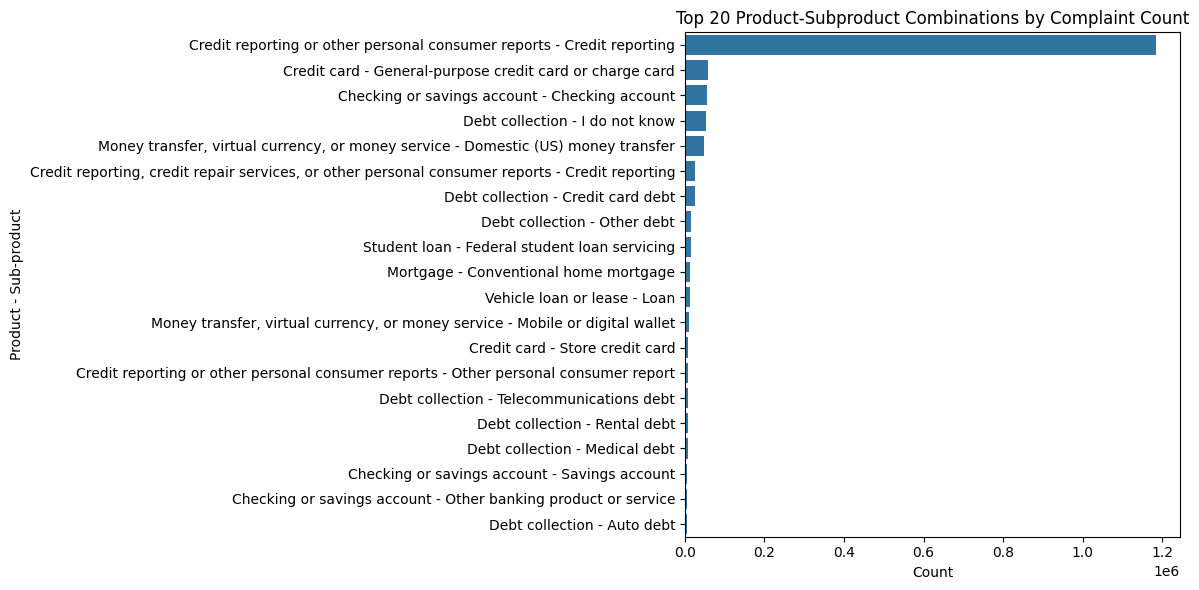

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limit to top N for better visualization if needed
top_n = 20
product_subproduct_counts_top_n = product_subproduct_counts_sorted.head(top_n)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y=product_subproduct_counts_top_n['Product'] + ' - ' + product_subproduct_counts_top_n['Sub-product'], data=product_subproduct_counts_top_n)
plt.title(f'Top {top_n} Product-Subproduct Combinations by Complaint Count')
plt.xlabel('Count')
plt.ylabel('Product - Sub-product')
plt.tight_layout()
plt.show()


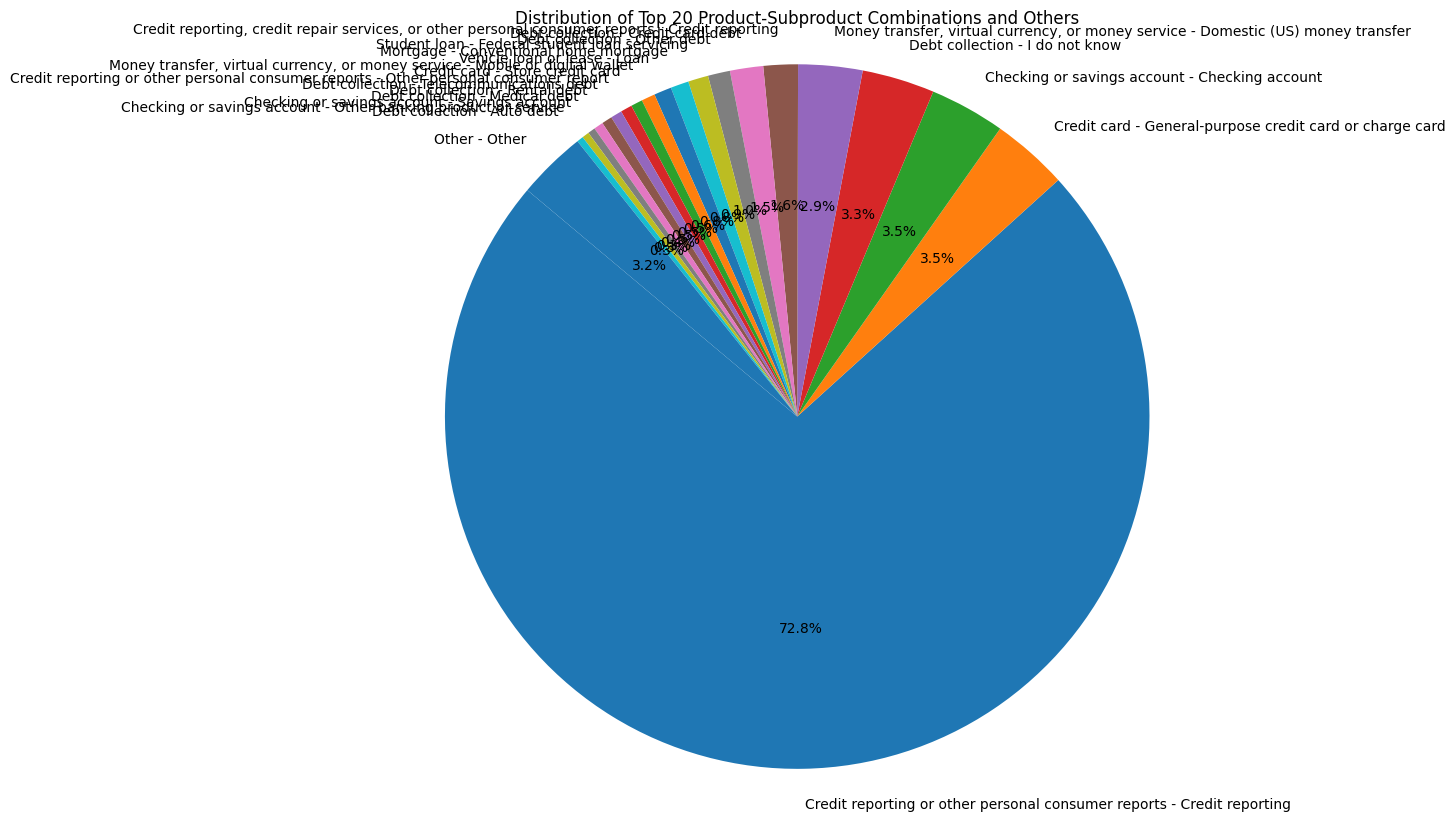

In [21]:
# Create a pie chart for the top N, with an "Other" category for the rest
plt.figure(figsize=(10, 10))
# Calculate the sum of the counts for the 'Other' category
other_count = product_subproduct_counts_sorted['Count'].iloc[top_n:].sum()
# Create a new DataFrame for the pie chart including 'Other'
pie_data = product_subproduct_counts_top_n.copy()
if other_count > 0:
    other_row = pd.DataFrame({
        'Product': ['Other'],
        'Sub-product': ['Other'],
        'Count': [other_count]
    })
    pie_data = pd.concat([pie_data, other_row], ignore_index=True)

plt.pie(pie_data['Count'], labels=pie_data['Product'] + ' - ' + pie_data['Sub-product'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Top {top_n} Product-Subproduct Combinations and Others')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()